# Обробка та аналіз БМД

Лабораторна робота №6

Виконав студент групи БС-81

Лукашевич Максим

1. Обрати реальні дані з kaggle або сгенерувати випадкові дані.

In [1]:
import scipy.stats as ss
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dat1 = [53, 50, 49, 54, 52, 55, 51, 50, 48, 51]
dat2 = [53, 49, 43, 48, 51, 54, 50, 51, 43, 47]
dataframe = pd.DataFrame({"Before":dat1, 
                          "After":dat2})

dataframe

,Before,After
0,53,53
1,50,49
2,49,43
3,54,48
4,52,51
5,55,54
6,51,50
7,50,51
8,48,43
9,51,47


2. Побудувати графік, що відображає розкид даних в групах.

[]

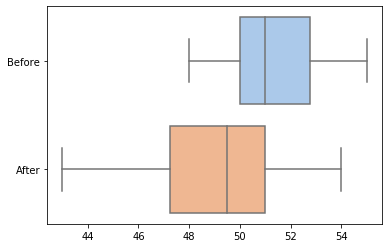

In [7]:
sns.boxplot(data=dataframe, 
            orient='h', 
            palette='pastel').set()

3. Написати функції:

3.1 Для оцінки зв'язку між групами за коефіцієнтом кореляції Пірсона. Функція має повертати значення коефіцієнту кореляції, значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

In [32]:
def mas_sum(massiv):
    s1 = 0
    for i in range(len(massiv)):
        s1+=((massiv[i])**2)
    return s1
def pirson(x, y):
    s1=sum(x)
    s2=sum(y)
    d=s1*s2
    k=0
    n = len(x)
    for i in range(n):
        k+=x[i]*y[i]
    s3=mas_sum(x)
    s4=(sum(x))**2
    s5=mas_sum(y)
    s6=((sum(y))**2)
    result=0
    p = ((n * k)-d)/(math.sqrt((n*s3-s4)*(n*s5-s6)))
    print('Coef Pirsona:     ' + str(p))
    r= len(x)-2
    print('Level of freedom: ' + str(r))
    table1 = pd.read_excel("table1.xlsx").iloc[r-1, 1 ]
    print("Correlation coef: " + str(table1))
    if table1<p:
        result = "Significant"
    else:
        result = "No significant"
    return result

3.2. Для визначення відмінності між групами за критерієм Стьюдента. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

In [33]:
def student(x, y):
    n=len(x)
    d=[]*n
    for i in range(n):
        d.append(x[i] - y[i])
    M=sum(d)/n
    L=0
    for i in range(n):
        L += ((M-d[i])**2)
    sigma = math.sqrt((L)/(n-1))
    tmp = M/(sigma/math.sqrt(n))
    print('Coef Studenta:        ' + str(tmp))
    r = n - 1
    print('Level of freedom:     ' + str(r))
    table2 = pd.read_excel("table2.xlsx").iloc[r-1, 1 ]
    print("Critical val of coef: " + str(table2))
    if table2<tmp:
        result = "Significant"
    else:
        result = "Not significant"
    return result

In [34]:
pirson(dat1, dat2)

Coef Pirsona:     0.7392222418250556
Level of freedom: 8
Correlation coef: 0.6319


'Significant'

In [35]:
student(dat1, dat2)

Coef Studenta:        2.929638451576174
Level of freedom:     9
Critical val of coef: 2.262


'Significant'

4. Висновок.

1) Після обробки данних не було виявлено жодної залежності.
2) Отримане значення критерію стюдента більше кртичного з цього можна зробити такий висновок, що наявність статично значущих відмінностей до та після.
3) 